# Table of contents

* [Getting started](#Getting-started)
* [Axis constructors](#Axis-constructors)
* [Profile plots](#Profile-plots)
* [Weighted data](#Weighted-data)
* [Books of histograms](#Books-of-histograms)
* [Manipulation methods](#Manipulation-methods)

  - [select](#select)
  - [project](#project)
  - [drop](#drop)
  - [rebin, rebinby](#rebin,-rebinby)

* [Combining histograms](#Combining-histograms)
* [Tabular output](#Tabular-output)

  - [table](#table)
  - [fraction](#fraction)
  - [pandas](#pandas)

* [Plotting methods](#Plotting-methods)
* [Exporting to ROOT](#Exporting-to-ROOT)

# Getting started

This notebook has histbook, pandas, and vega installed.

In [1]:
from histbook import *
import numpy
from vega import VegaLite as canvas

Let's start by histogramming a simple array of data.

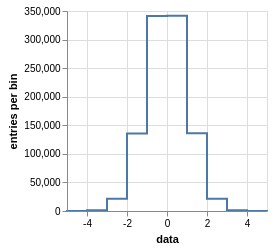

In [2]:
array = numpy.random.normal(0, 1, 1000000)
histogram = Hist(bin("data", 10, -5, 5))
histogram.fill(data=array)
histogram.step("data").to(canvas)

*What just happened here?*

- The first line created a million-element Numpy `array`.
- The second created a one-dimensional `histogram`, splitting `data` into 10 bins from −5 to 5.
- The third line incremented histogram bins by counting the number of values that lie within each of the 10 subintervals.
- The fourth line projected the hypercube onto steps in the `data` axis and passed the Vega-Lite visualization to `canvas`.

We could also access the data as a table, as a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html):

In [3]:
histogram.pandas()

,count(),err(count())
data,,
"[-inf, -5.0)",0.0,0.000000
"[-5.0, -4.0)",38.0,6.164414
"[-4.0, -3.0)",1274.0,35.693137
"[-3.0, -2.0)",21228.0,145.698318
"[-2.0, -1.0)",135715.0,368.395168
"[-1.0, 0.0)",341209.0,584.130978
"[0.0, 1.0)",341801.0,584.637495
"[1.0, 2.0)",136063.0,368.867185
"[2.0, 3.0)",21323.0,146.023971


including underflow (`[-inf, -5.0)`), overflow (`[5.0, inf)`), and nanflow (`{NaN}`). In the absence of weights, the error in the count is the square root of the count (approximation of [Poisson statistics](https://en.wikipedia.org/wiki/Poisson_distribution); histbook makes the same statistical assumptions as ROOT).

This example was deliberately simple. We can extend the binning to two dimensions and use expressions in the axis labels, rather than simple names:

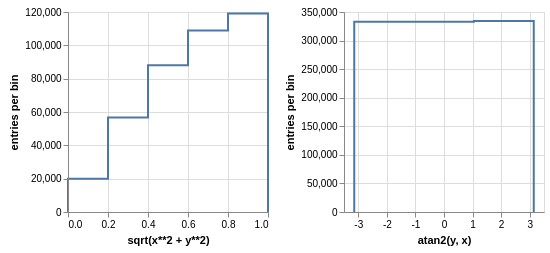

In [4]:
import math
hist = Hist(bin("sqrt(x**2 + y**2)", 5, 0, 1),
            bin("arctan2(y, x)", 3, -math.pi, math.pi))
hist.fill(x=numpy.random.normal(0, 1, 1000000),
          y=numpy.random.normal(0, 1, 1000000))
beside(hist.step("sqrt(y**2 + x**2)"), hist.step("arctan2(y,x)")).to(canvas)

Note that I defined the first axis as `sqrt(x**2 + y**2)` and then accessed it as `sqrt(y**2 + x**2)` (x and y are reversed). The text between quotation marks is not a label that must be matched exactly, it's a symbolic expression that is matched algebraically.

The data contained in the [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) is two-dimensional, which you can see by printing it as a Pandas table. (Pandas pretty-prints the nested indexes.)

In [5]:
hist.pandas()

count()  err(count())
sqrt(x**2 + y**2) arctan2(y, x)                                            
[-inf, 0.0)       [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)       0.0      0.000000
                  [-1.0471975512, 1.0471975512)         0.0      0.000000
                  [1.0471975512, 3.14159265359)         0.0      0.000000
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[0.0, 0.2)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)    6621.0     81.369527
                  [-1.0471975512, 1.0471975512)      6551.0     80.938248
                  [1.0471975512, 3.14159265359)      6757.0     82.200973
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[0.2, 0.4)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)   18892.0    137.448172
                  [-1.0471975512, 1.0471975512)     19007.0    137.865877
                  [1.0471975512, 3.14159265359)     18841.0    137.262522
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[0.4, 0.6)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)   29248.0    171.020467
                  [-1.0471975512, 1.0471975512)     29429.0    171.548827
                  [1.0471975512, 3.14159265359)     29409.0    171.490525
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[0.6, 0.8)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)   36213.0    190.297136
                  [-1.0471975512, 1.0471975512)     36306.0    190.541334
                  [1.0471975512, 3.14159265359)     36429.0    190.863826
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[0.8, 1.0)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)   39731.0    199.326366
                  [-1.0471975512, 1.0471975512)     39372.0    198.423789
                  [1.0471975512, 3.14159265359)     40035.0    200.087481
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
[1.0, inf)        [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)  202128.0    449.586477
                  [-1.0471975512, 1.0471975512)    202262.0    449.735478
                  [1.0471975512, 3.14159265359)    202769.0    450.298790
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000
{NaN}             [-inf, -3.14159265359)                0.0      0.000000
                  [-3.14159265359, -1.0471975512)       0.0      0.000000
                  [-1.0471975512, 1.0471975512)         0.0      0.000000
                  [1.0471975512, 3.14159265359)         0.0      0.000000
                  [3.14159265359, inf)                  0.0      0.000000
                  {NaN}                                 0.0      0.000000

With multiple dimensions, we can project it out different ways. The [overlay](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.overlay) method draws all the bins of one axis as separate lines in the projection of the other.

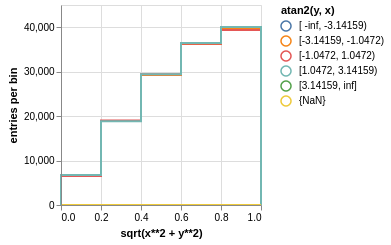

In [6]:
hist.overlay("arctan2(y, x)").step("sqrt(x**2+y**2)").to(canvas)

The [stack](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.stack) method draws them cumulatively, though it only works with [area](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.area) (filled) rendering.

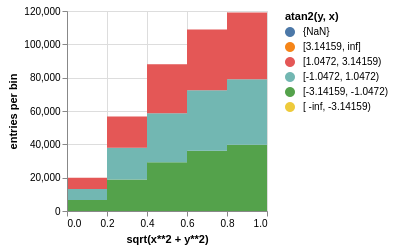

In [7]:
hist.stack("arctan2(y, x)").area("sqrt(x**2+y**2)").to(canvas)

The underflow, overflow, and nanflow curves are empty. Let's exclude them with a post-aggregation selection. You can select at any bin boundary of any axis, as long as the inequalities match (e.g. `<=` for left edges and `<` for right edges for an axis with `closedlow=True`).

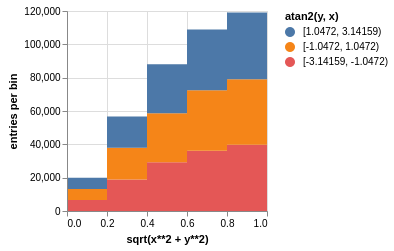

In [8]:
r = "sqrt(x**2 + y**2)"
phi = "arctan2(y, x)"
hist.select("-pi <= arctan2(y, x) < pi").stack(phi).area(r).to(canvas)

We can also split side-by-side and top-down:

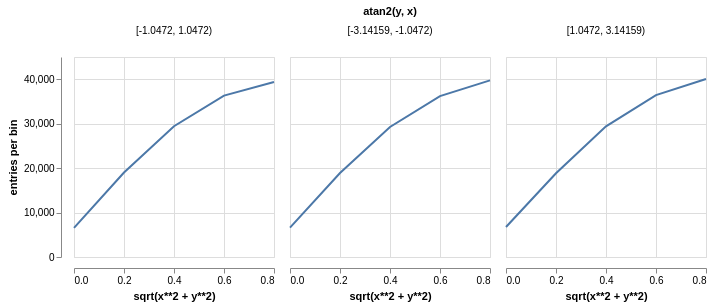

In [9]:
hist.select("-pi <= arctan2(y, x) < pi").beside(phi).line(r).to(canvas)

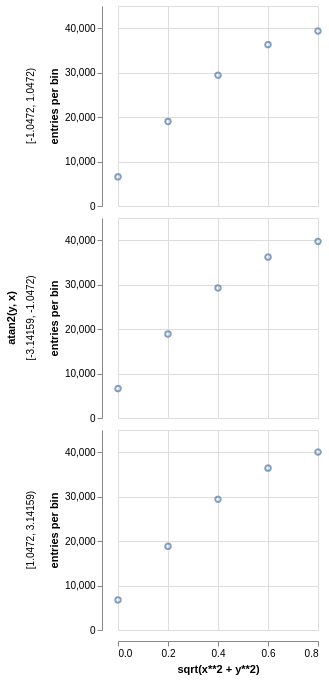

In [10]:
hist.select("-pi <= arctan2(y, x) < pi").below(phi).marker(r, error=False).to(canvas)

Notice that the three subfigures are labeled by their `arctan2(y, x)` bins. This "trellis plot" formed with [beside](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.beside) and [below](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.below) separated data just as [overlay](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.overlay) and [stack](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.stack) separated data. Using all but one together, we could visualize four dimensions at once:

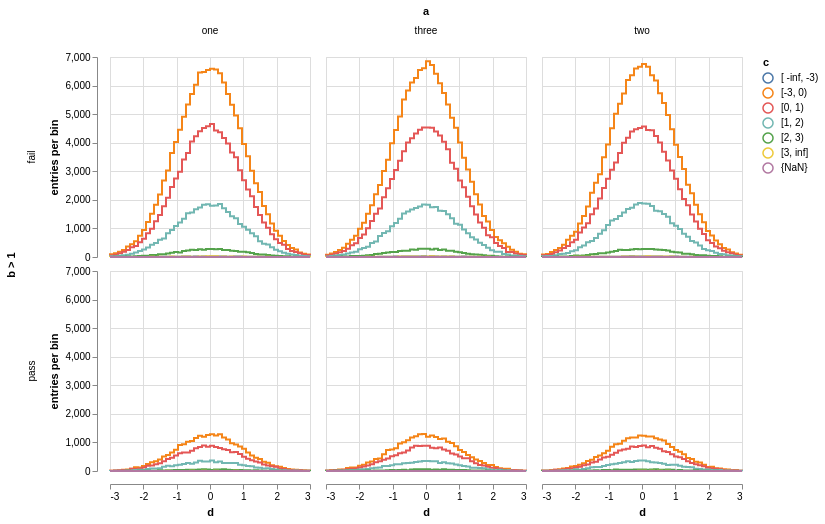

In [11]:
import random
labels = "one", "two", "three"
hist = Hist(groupby("a"),                     # categorical axis: distinct strings are bins
            cut("b > 1"),                     # cut axis: two bins (pass and fail)
            split("c", (-3, 0, 1, 2, 3)),     # non-uniformly split the data
            bin("d", 50, -3, 3))              # uniform bins, conventional histogram
hist.fill(a=[random.choice(labels) for i in range(1000000)],
          b=numpy.random.normal(0, 1, 1000000),
          c=numpy.random.normal(0, 1, 1000000),
          d=numpy.random.normal(0, 1, 1000000))
hist.beside("a").below("b > 1").overlay("c").step("d").to(canvas)

In the above, only the last line does any drawing. The syntax is deliberately succinct to encourage interactive exploration. For instance, you can quickly switch from plotting "`c`" side-by-side with "`b > 1`" as bars:

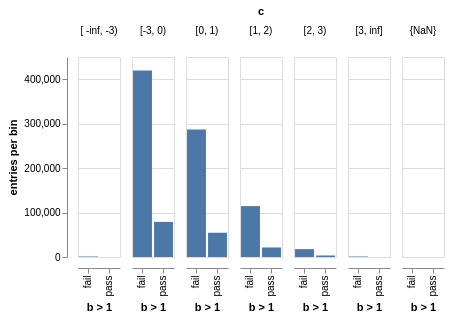

In [12]:
hist.beside("c").bar("b > 1").to(canvas)

to plotting "`b > 1`" side-by-side with "`c`" as bars:

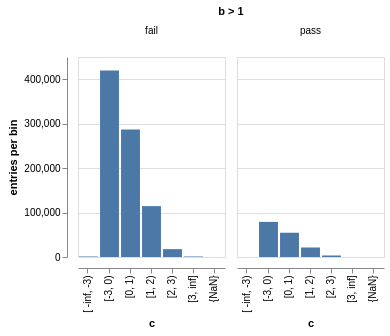

In [13]:
hist.beside("b > 1").bar("c").to(canvas)

or rather, as an area:

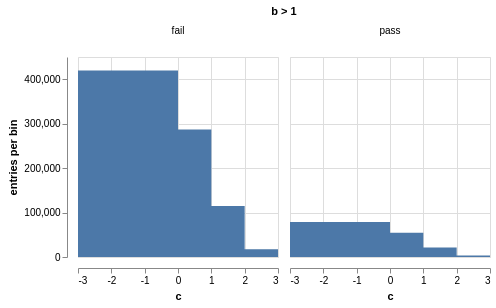

In [14]:
hist.beside("b > 1").area("c").to(canvas)

We see the same trend in different ways. Whatever axes are not mentioned are summed over: imagine a hypercube whose shadows you project onto the graphical elements of bars, areas, lines, overlays, and trellises.

# Axis constructors

Histograms can be built from the following types of axis:

* [groupby(expr)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.groupby) to bin by unique values, usually strings or integers (categorical binning)
* [groupbin(expr, binwidth)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.groupbin) to create new bins when they appear in the data (regularly spaced, sparse binning)
* [bin(expr, numbins, low, high)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.bin) for a fixed number of bins in a given range (regularly spaced, dense binning)
* [intbin(expr, min, max)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.intbin) for integer-valued bins between min and max, inclusive (same as above, but for integers)
* [split(expr, edges)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.split) for a fixed number of bins between a set of given edges (irregularly spaced, dense binning)
* [cut(expr)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.cut) to divide the data into entries that pass or fail a boolean predicate (two bins)
* [profile(expr)](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.profile) to collect the mean and error in the mean of a dependent variable (not binned)

# Profile plots

We can profile "`y`" and "`z`" or as many distributions as we want in a single [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) object.

In [15]:
x = numpy.random.normal(0, 1, 10000)
y = x**2 + numpy.random.normal(0, 5, 10000)
z = -x**3 + numpy.random.normal(0, 5, 10000)

h = Hist(bin("x", 100, -5, 5), profile("y"), profile("z"))
h.fill(x=x, y=y, z=z)
beside(h.marker("x", "y"), h.marker("x", "z")).to(canvas)

h.select("-1 <= x < 1").pandas("y", "z")

,count(),err(count()),y,err(y),z,err(z)
x,,,,,,
"[-1.0, -0.9)",255.0,15.968719,1.179317,0.300133,1.303769,0.322983
"[-0.9, -0.8)",268.0,16.370706,0.594773,0.296659,0.361909,0.294543
"[-0.8, -0.7)",292.0,17.088007,0.710769,0.275830,0.880188,0.288599
"[-0.7, -0.6)",339.0,18.411953,0.652319,0.268049,-0.062861,0.258746
"[-0.6, -0.5)",343.0,18.520259,0.602260,0.281619,0.163188,0.242719
"[-0.5, -0.4)",405.0,20.124612,0.514427,0.235804,-0.042901,0.249675
"[-0.4, -0.3)",371.0,19.261360,-0.327814,0.251344,-0.777015,0.254110
"[-0.3, -0.2)",398.0,19.949937,-0.132544,0.240963,0.135838,0.260081
"[-0.2, -0.1)",374.0,19.339080,0.263459,0.261692,0.247373,0.264020


Although each non-profile axis multiplies the number of bins and therefore its memory use, profiles merely add to the number of bins. In fact, they share some statistics, making it 33% (unweighted) to 50% (weighted) more efficient to combine profiles with the same binning. Perhaps more importantly, it's an organizational aid.

# Weighted data

In addition to bins, [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) takes a `weight` parameter to compute weights for each input value. A value with weight 2 is roughly equivalent to having two values with all other attributes being equal (for counts, sums, and means, but not standard deviations). Weights may be zero or even negative.

For example: without weights, counts are integers and the effective counts (used for weighted profiles) are equal to the counts.

In [16]:
x = numpy.random.normal(0, 1, 10000)
y = x**2 + numpy.random.normal(0, 5, 10000)

h = Hist(bin("x", 100, -5, 5), profile("y"))
h.fill(x=x, y=y)
h.select("-0.5 <= x < 0.5").pandas("y", effcount=True)

,count(),err(count()),effcount(),y,err(y)
x,,,,,
"[-0.5, -0.4)",350.0,18.708287,350.0,-0.244509,0.280009
"[-0.4, -0.3)",349.0,18.681542,349.0,0.190337,0.278765
"[-0.3, -0.2)",387.0,19.672316,387.0,0.173212,0.249086
"[-0.2, -0.1)",421.0,20.518285,421.0,-0.120869,0.243760
"[-0.1, 0.0)",392.0,19.798990,392.0,0.525305,0.246438
"[0.0, 0.1)",410.0,20.248457,410.0,0.408368,0.269439
"[0.1, 0.2)",392.0,19.798990,392.0,0.589688,0.268910
"[0.2, 0.3)",385.0,19.621417,385.0,-0.151916,0.267837
"[0.3, 0.4)",391.0,19.773720,391.0,-0.284123,0.265441


Below, we make the weights normal-distributed with a mean of 1 and a standard deviation of 4 (many of them are negative, but the average is 1). The counts are no longer integers, errors in the count are much larger, effective counts much smaller, and it affects the profile central values and errors.

In [17]:
h = Hist(bin("x", 100, -5, 5), profile("y"), weight="w")
h.fill(x=x, y=y, w=numpy.random.normal(1, 4, 10000))
h.select("-0.5 <= x < 0.5").pandas("y", effcount=True)

,count(),err(count()),effcount(),y,err(y)
x,,,,,
"[-0.5, -0.4)",227.232344,74.032045,9.421083,-1.919464,1.501579
"[-0.4, -0.3)",387.244871,73.803218,27.530922,0.092170,1.182479
"[-0.3, -0.2)",329.643712,78.859104,17.473742,-0.167963,1.377854
"[-0.2, -0.1)",493.650096,85.448774,33.375423,-0.968527,0.888656
"[-0.1, 0.0)",398.358250,87.622002,20.669087,1.102602,0.954778
"[0.0, 0.1)",348.267074,82.435427,17.848308,1.430262,1.470200
"[0.1, 0.2)",366.972782,78.569826,21.815045,0.854666,0.861209
"[0.2, 0.3)",305.849005,77.978412,15.383862,-1.326596,0.566366
"[0.3, 0.4)",284.811889,80.263031,12.591722,0.257271,0.726364


# Books of histograms

A histogram [Book](http://histbook.readthedocs.io/en/latest/books-of-histograms.html#histbook.hist.Book) acts like a Python dictionary, mapping string names to [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) objects. It provides the convenience of having only one object to [fill](http://histbook.readthedocs.io/en/latest/books-of-histograms.html#histbook.hist.Book.fill) (important in a complicated parallelization scheme), but also optimizes the calculation of those histograms to avoid unnecessary passes over the data.

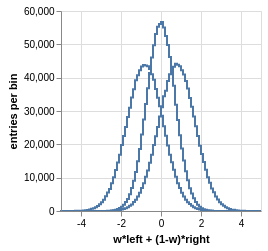

In [18]:
book = Book()
for w in 0.1, 0.5, 0.9:
    book["w %g" % w] = Hist(bin("w*left + (1-w)*right", 100, -5, 5), defs={"w": w})

left = numpy.random.normal(-1, 1, 1000000)
right = numpy.random.normal(1, 1, 1000000)
book.fill(left=left, right=right)            # one "fill" for all histograms

overlay(book["w 0.1"].step(),
        book["w 0.5"].step(),
        book["w 0.9"].step()).to(canvas)

In the above, we created three similar histograms, differing only in how to weight two subexpressions. The use of `defs` for substituting constants (or any expression) makes it easier to generate many histograms in a loop.

Note that the number of bins (memory use) scales as

$B_1 \times \ldots \times B_n \times (P_1 + \ldots + P_m))_1 + \ldots + (B_1 \times \ldots \times B_n \times (P_1 + \ldots + P_m))_k$

where $B_i$ is the number of bins in non-profile axis $i$, $P_i$ is the number of bins in profile axis $i$, and the whole expression is repeated for each histogram $k$ in a book. That is, books add memory use, non-profile axes multiply, and profile axes add within the non-profile axes.

# Manipulation methods

## [select](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.select)

Select a set of bins with a boolean `expr`, returning a new [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist). Cut boundaries may be approximate (within `tolerance`), but the inequalities must be exact.

For example, if the low edge of each bin is closed, attempting to cut above it without including it is an error, as is attempting to cut below it with including it:

In [19]:
h = Hist(bin("x", 100, -5, 5, closedlow=True))
h.select("x <= 0")

ValueError: no axis can select 'x <= 0' (axis bin('x', 100, -5.0, 5.0) has the wrong inequality; low edges are closed)

*(note! the above was supposed to fail!)*

whereas

In [20]:
h.select("x < 0")
(bin('x', 50, -5.0, 0.0, overflow=False, nanflow=False))

bin('x', 50, -5.0, 0.0, overflow=False, nanflow=False)

Any selection other than "`x == nan`" eliminates the nanflow because every comparison with "not a number" should yield `False`. (So technically, "`x == nan`" shouldn't work— this deviation from strict IEEE behavior is for convenience.)

Selections can never select a partial bin, so filling a histogram and then selecting from it should yield exactly the same result as filtering the data before filling.

Categorical [groupby](http://histbook.readthedocs.io/en/latest/axis-descriptors.html#histbook.axis.groupby) axes can be selected with Python's `in` operator and constant sets (necessary because there are no comparators for categorical data other than `==`, `!=`, and `in`).

In [21]:
h = Hist(groupby("c"))
h.fill(c=["one", "two", "two", "three", "three", "three"])
h.pandas()

h.select("c in {'one', 'two'}").pandas()

,count(),err(count())
c,,
one,1.0,1.000000
two,2.0,1.414214


## [project](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.project)

Reduces the number of non-profile axes to the provided set, `*axis`, by summing over all other non-profile axes.

All internal data are sums that are properly combined by summing. For instance, histograms are represented by a count (unweighted) or a sum of weights and squared-weights (weighted), and profiles are represented by a sum of the quantity times weight and a sum of the squared-quantity times weight.

## [drop](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.drop)

Eliminates all profile axes except the provided set, `*profile`.

If a [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) were represented as a table, non-profile axes form a compound key but profile axes are simple columns, which may be dropped without affecting any other data.

## [rebin, rebinby](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.rebin)

Eliminates or sums neighboring bins to reduce the number of bins in an axis to `edges` or by a multiplicative `factor`.

A [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) with detailed binning in two dimensions can be plotted against one axis with rebinned overlays in the other axis and vice-versa.

# Combining histograms

Separately filled histograms ([Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) or [Book](http://histbook.readthedocs.io/en/latest/books-of-histograms.html#histbook.hist.Book)) that represent the same data can be combined by adding them with the `+` operator. This simply adds all bins (like ROOT's hadd).

However, you may also want to combine qualitatively different data while maintaining their distinction as a new categorical axis. A common reason for this is to make a stacked plot of different distributions, such as different Monte Carlo samples in physics. For this, you use the [Hist.group](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.group) or [Book.group](http://histbook.readthedocs.io/en/latest/books-of-histograms.html#histbook.hist.Book.group) static methods.

For example, suppose that we have two histograms filled with different data:

In [22]:
h1 = Hist(bin("x", 10, -5, 5))
h2 = Hist(bin("x", 10, -5, 5))
h1.fill(x=numpy.random.normal(-2.5, 1, 1000000))
h2.fill(x=numpy.random.normal(2.5, 1, 1000000))

Adding them mixes data into the same bins, after which they are no longer seperable.

In [23]:
(h1 + h2).pandas()

,count(),err(count())
x,,
"[-inf, -5.0)",6175.0,78.581168
"[-5.0, -4.0)",60753.0,246.481237
"[-4.0, -3.0)",242306.0,492.245874
"[-3.0, -2.0)",382548.0,618.504648
"[-2.0, -1.0)",241822.0,491.754004
"[-1.0, 0.0)",66493.0,257.862366
"[0.0, 1.0)",66649.0,258.164676
"[1.0, 2.0)",242490.0,492.432737
"[2.0, 3.0)",383077.0,618.932145


But grouping them creates a new categorical axis, "`source`" by default, where each distribution is associated with an assigned categorical value.

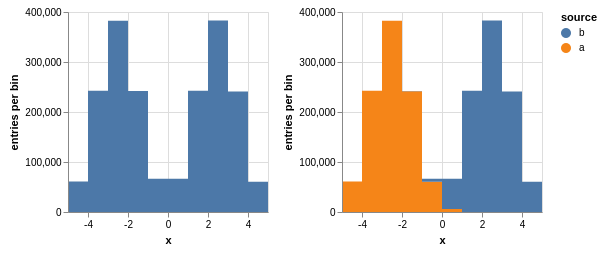

In [24]:
h = Hist.group(a=h1, b=h2)
h.pandas()

beside(h.area("x"), h.stack("source").area("x")).to(canvas)

For both types of combination, all axes of the [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist) or all histograms in the [Book](http://histbook.readthedocs.io/en/latest/books-of-histograms.html#histbook.hist.Book) must be identical.

# Tabular output

## [table](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.table)

Presents data from the histogram as a Numpy array,

## [fraction](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.fraction)

Presents cut fractions (cut efficiencies) as a function of non-profile axes for each `cut`.

## [pandas](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.pandas)

Presents a [Hist.table](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.table) as a Pandas DataFrame if all `*axis` are profiles or [Hist.fraction](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.fraction) if all `*axis` are cuts.

# Plotting methods

An n-dimensional histogram is plotted by spreading its bins across the horizontal axis, across overlaid curves, across a cumulative stack, or across horizontal or vertical side-by-side plots. Any dimensions not spread across a graphical channel are summed, so these plots are a kind of projection. A typical use is to [select](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.select) and [rebin](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.rebin) first, spread zero or more axes across overlays or trellis (side-by-side) channels, then spread the last axis across horizontal bins.

The syntax for these operations is fluent: histogram-dot-operation-dot-operation-dot-plot. A chain of selection/rebinning/plotting operations ends with [.vegalite()](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.Plotable.vegalite) (for a Vega-Lite JSON object) or [.to(canvas)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.Plotable.to) (where `canvas` is a callable that draws the Vega-Lite). Chainable plotting operations are:

* [overlay(axis)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.overlay) to spread the bins of `axis` across overlaid curves
* [stack(axis, order=None)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.stack) to stack them cumulatively with an optional `order` (can only be used if [area](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.area) is the terminal operation in the chain)
* [beside(axis)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.beside) to spread the bins of `axis` across horizontally arranged plots
* [below(axis)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.below) to spread the bins of `axis` across vertically arranged plots

The following plotting operations are terminal: they must be last in a chain.

* [bar(axis=None, profile=None, error=False)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.bar) to draw bar plots (`axis` must be specified if the histogram has more than one; `profile` to draw a dependent variable instead of counts; and `error` to overlay error bars)
* [step(axis=None, profile=None, error=False)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.step) to draw step-wise histograms
* [area(axis=None, profile=None, error=False)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.area) to draw filled areas (only terminal operation that can be used with a [stack](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.stack))
* [line(axis=None, profile=None, error=False)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.line) to draw connected lines
* [marker(axis=None, profile=None, error=True)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.PlottingChain.marker) to draw points (note: by default, `error=True`)

In addition, terminated plotting chains can be combined with the following operations. The output of these functions can be plotted with [.vegalite()](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.Plotable.vegalite) (for a Vega-Lite JSON object) or [.to(canvas)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.Plotable.to).

* [overlay(*plotables)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.overlay) to overlay plots
* [beside(*plotables)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.beside) to arrange plots horizontally
* [below(*plotables)](http://histbook.readthedocs.io/en/latest/plotting.html#histbook.vega.below) to arrange plots vertically

# Exporting to ROOT

## [Hist.root(*axis)](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist.root)

Returns a PyROOT histogram projected on `*axis`. The type (`TH1`, `TH2`, `TProfile`, ...) depends on the [Hist](http://histbook.readthedocs.io/en/latest/histograms.html#histbook.hist.Hist).